In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
# 네트워크 = 노드(node) + 엣지(edge)
# ex> 신경망 = 뉴런 + 시냅스, DB = 테이블 + FK 

import random

data = pd.read_csv('C:/import/nx_practice.csv', header=0)
df = data.head(1000)

G = nx.Graph()

names = df['product_name'].tolist()
ingredients = df['eng_name'].tolist()


layout = {}
for product_name in names :
    layout[product_name]= [random.randint(0,100),random.randint(0,100)]
print(layout)

{'이즈칸 램 30': [33, 80], '파미나 Vet Life Dog 하이포엘러제닉 달걀&쌀': [80, 44], '슈슈 슈퍼푸드 어덜트 치킨 & 라이스': [78, 55], '원더독스 진도': [79, 87], '원더독스': [39, 49], '페디그리 쇠고기맛 캔': [13, 41], '페디그리 닭고기맛 캔': [63, 3], '사조 투펫 치킨엔라이스': [5, 76], '사조 투펫 양고기엔라이스': [68, 20], '사조 투펫 어덜트': [49, 58], '사조 투펫 포퍼먼스': [2, 44], '사조 투펫 카노': [7, 8], '사조 투펫 녹차 진도': [91, 44], '사조 투펫 스페셜 맥스': [19, 84], '사조 투펫 에코밀': [50, 1], '사조 펫시아 짱': [77, 60], '사조 펫시아 퍼피 마이스터': [50, 10], '사조 펫시아 퍼피': [76, 89], '대한사료 도그라인 베스트': [5, 89], '대한사료 도그라인 나이스': [5, 73], '대한사료 도그라인 아지피아': [93, 93], '아나멧 도그푸드 어덜트 23% Protein': [7, 56], '아나멧 도그푸드 앙코르 25% Protein': [95, 98], '캣츠아이 키튼&캣': [52, 25], '캣츠아이 에코30': [2, 11], '캣츠업': [39, 20], '스타캣': [22, 47], '오프레시 프라임 키튼': [44, 93], '오프레시 프라임 캣': [14, 98], '프로베스트 캣 프라임 키튼': [87, 64], '프로베스트 캣 프라임 어덜트': [70, 72], '프로베스트 캣 밸런스': [48, 53], '프로베스트 캣 블루': [30, 26], '사조 투펫 캣': [97, 75], '테비랑 생연어': [72, 11], '테비랑 유산균': [63, 66], '테비 플러스케어': [33, 51], '테비타퍼 미스터캣 20 연어': [48, 34], '테비타퍼 미스터캣 15 유산균': [25, 75], '사조 펫시아 캣리치': [

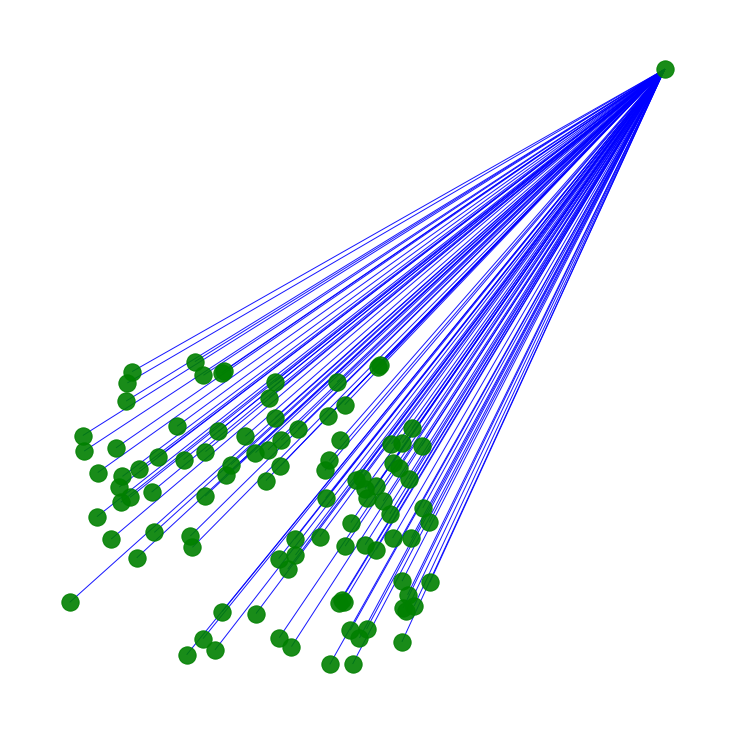

In [21]:
data = pd.read_csv('C:/import/nx_practice.csv', header=0)
df = data.head(100)

G = nx.Graph()

names = df['product_name'].tolist()
ingredients = df['eng_name'].tolist()

#노드 추가
for name in names :
    G.add_node(name)
for ingredient in ingredients :
    G.add_node(ingredient)

#엣지 추가
edges = []
for index in range(len(df)) :
    k = (df['product_name'][index],df['eng_name'][index])
    edges.append(k)
G.add_edges_from(edges)

layout = {}
for product_name in names :
    layout[product_name]= [random.uniform(0,1),random.uniform(0,1)]
for eng_name in ingredients :
    layout[eng_name] = [random.uniform(1.5,2),random.uniform(1.5,2)]


plt.figure(figsize = (10,10))
# nx.draw(G, layout, with_labels = False, font_weight = 'bold', font_family = 'MalGun Gothic', alpha = 0.9, edge_color = 'blue', node_color = 'green'
# , font_size = 5, node_size = 300 )

nx.draw_networkx_nodes( G, layout, nodelist = product, node_size = 80 , node_color = '#FFE5E5', alpha = 0.7,label = True)
# ingred_name 그리자
nx.draw_networkx_nodes(G, layout, nodelist = dic_index, node_color = '#66BB76', node_size = 100, alpha = 0.8 )
# 기타
nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')

#오차범위가 0.03

def rand_numbers(a,b,n) :
    x_range = []
    for i in range(0,n+1) :
        if i != 0 :
            while abs(x_range[i] - x_range[i-1]) > 0.03 :
                x_range[i] = random.uniform(a,b)   
           

        elif i == 0 :
            x_range[i] = random.uniform(a,b)   


In [44]:
def rand_numbers(start,end,number,ocha) :
    x_range = []
    for i in range(0,number) :
        if i != 0 :
            x_range.append(random.uniform(start,end))
            if abs(x_range[i] - x_range[i-1]) <= ocha :
                
                while abs(x_range[i] - x_range[i-1]) > ocha : 
                    x_range.pop()
                    x_range.append(random.uniform(start,end))
           

        elif i == 0 :
            x_range.append(random.uniform(start,end))
    
    return x_range

rand_numbers(0,10,3,3)

[6.593044323838747, 4.4165166472893205, 0.7764389004612038]

In [ ]:
 
 x_range=[1]
 x_range.append(random.uniform(0,3))
 while abs(x_range[1] - x_range[0]) > 2 : 
                    x_range.pop()
                    x_range.append(random.uniform(0,3))

In [ ]:
plt.figure(figsize = (1000,1000))
# 1. 그래프 만들기
g = nx.from_pandas_edgelist(data, source=‘product’, target= ‘dic_index’)
# 2. 노드를 위한 layout 만들기
layout = nx.spring_layout(g, iterations = 50)
# 3. 그림 그리기
# 엣지 = thin & gray
# product = small & #66BB76 / 얘만 라벨링 !
# ingred_name = 사이즈는 connection 수에 따라 차이가 있도록, #FAA14A
# product who are highly connected are a highlighted color
product_size = [  g.degree(product)*20 for product in products ]
print(product_size)
nx.draw_networkx_nodes( g, layout, nodelist = product, node_size = 80 , node_color = '#FFE5E5', alpha = 0.7)
# ingred_name 그리자
nx.draw_networkx_nodes(g, layout, nodelist = dic_index, node_color = '#66BB76', node_size = 100, alpha = 0.8 )
# 기타
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')
node_labels = dict(zip(products, products))
#nx.draw_networkx_labels (g, layout, labels = node_labels)



